# 🔍 01. 센서 열화상 데이터 시각화

이 노트북에서는 `left_data.csv`에 포함된 열화상 데이터를 시각화하여  
데이터의 구조를 이해하고, 이후 품질 진단 흐름의 기초를 다집니다.


📌 1단계: 라이브러리 및 경로 설정

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

data_dir = Path("..") / "raw_data"
label_path = Path("..") / "labels" / "left_label.json"

📌 2단계: 온도 벡터 데이터 로딩 및 기본 정보 확인

In [20]:
df_data = pd.read_csv(data_dir / "left_data.csv", header = None)
print(f"데이터 shape: {df_data.shape}")
df_data.head()

데이터 shape: (414, 81920)


,0,1,2,3,4,5,6,7,8,9,...,81910,81911,81912,81913,81914,81915,81916,81917,81918,81919
0,17.392,17.349,17.436,17.522,17.544,17.587,17.738,17.825,17.825,17.825,...,16.172,16.172,16.150,16.150,16.150,16.237,16.106,16.259,16.215,16.193
1,17.846,17.889,17.932,17.954,17.954,18.062,18.105,18.212,18.276,18.255,...,16.478,16.456,16.434,16.413,16.303,16.522,16.456,16.522,16.522,16.522
2,17.284,17.306,17.327,17.392,17.371,17.414,17.457,17.652,17.630,17.674,...,16.522,16.566,16.369,16.391,16.391,16.566,16.478,16.478,16.369,16.391
3,17.695,17.565,17.609,17.760,17.652,17.695,17.695,17.868,17.846,17.825,...,16.478,16.369,16.325,16.413,16.500,16.500,16.434,16.347,16.347,16.347
4,17.544,17.262,17.414,17.587,17.544,17.522,17.522,17.760,17.760,17.695,...,16.347,16.325,16.237,16.347,16.347,16.369,16.391,16.193,16.325,16.347


📌 3단계: 두께 라벨 JSON 불러오기 및 병합 준비

In [21]:
with open(label_path) as f:
    label_list = json.load(f)

df_label = pd.DataFrame(label_list, columns = ["thickness"])
df_label["id"] = df_label.index
df_label.head()


,thickness,id
0,1.58,0
1,1.59,1
2,1.60,2
3,1.70,3
4,1.72,4


📌 4단계: 품질 기준 기반 라벨링

In [22]:
def classiy(thickness):
    return "OK" if 0.8<thickness<1.5 else "NG"

df_label["label"] = df_label["thickness"].apply(classify)
df_label["label"].value_counts()


label
OK    283
NG    131
Name: count, dtype: int64

📌 5단계: 샘플 벡터 시각화 (1D plot)

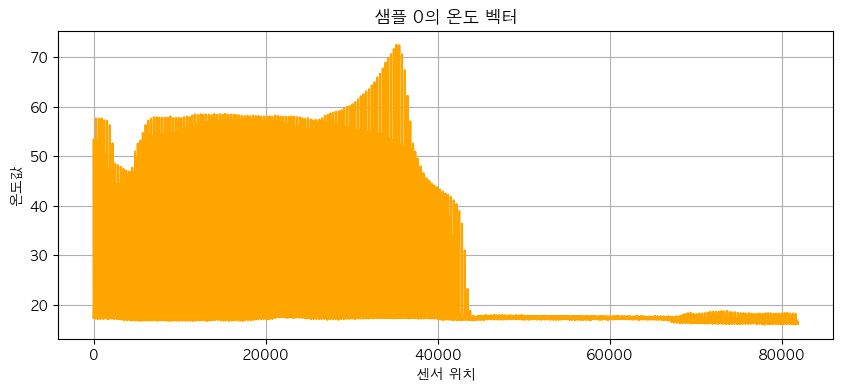

In [23]:
sample_id =0
vector = df_data.iloc[sample_id]

plt.figure(figsize=(10,4))
plt.plot(vector, color="orange")
plt.title(f"샘플 {sample_id}의 온도 벡터")
plt.xlabel("센서 위치")
plt.ylabel("온도값")
plt.grid(True)
plt.show()


📌 6단계: 다수 샘플 시각화 (OK vs NG 비교)

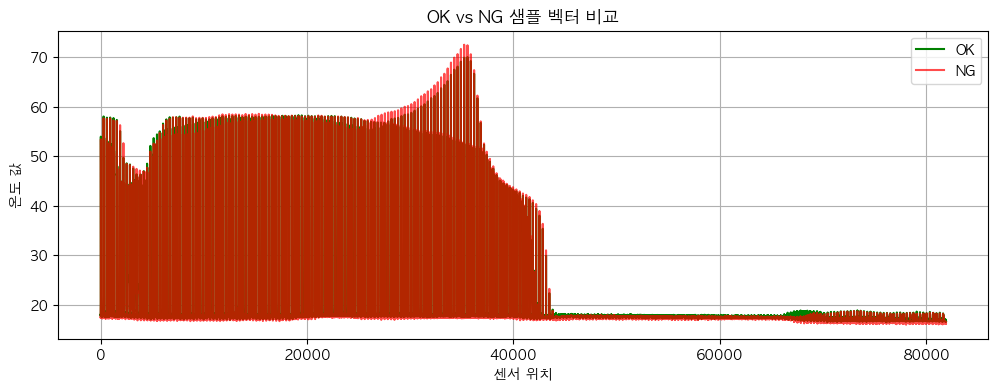

In [39]:
ok_id = df_label[df_label["label"] == "OK"].index[0]
ng_id = df_label[df_label["label"] == "NG"].index[0]

plt.figure(figsize=(12,4))
plt.plot(df_data.iloc[ok_id], label="OK", color="green")
plt.plot(df_data.iloc[ng_id], label="NG", color="red", alpha=0.7)
plt.title("OK vs NG 샘플 벡터 비교")
plt.xlabel("센서 위치")
plt.ylabel("온도 값")
plt.legend()
plt.grid(True)
plt.show()


📌 7단계: 온도값 기본 통계 확인

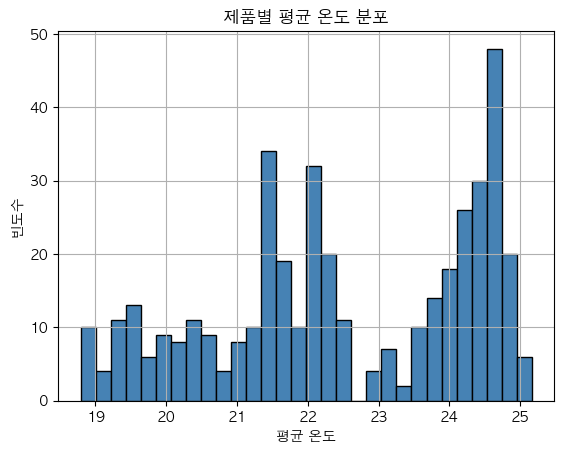

In [40]:
df_data["mean_temp"] = df_data.mean(axis=1)

plt.hist(df_data["mean_temp"], bins=30, color="steelblue", edgecolor="black")
plt.title("제품별 평균 온도 분포")
plt.xlabel("평균 온도")
plt.ylabel("빈도수")
plt.grid(True)
plt.show()

